In [4]:
!pip install seaborn
!pip install scikit-learn

You should consider upgrading via the 'D:\python\pythonProejct\01. Crawling\studyPython\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


You should consider upgrading via the 'D:\python\pythonProejct\01. Crawling\studyPython\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
# 수식을 이해할 필요는 없음, 제공된 그림만 보고 원리를 이해
# 선형판별분석(LDA) => 선형판별함수(1차 함수)를 이용하여 목표변수의 범주를 판별
# 데이터 로드 및 특성변수 와 목적변수 분리
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']

# 목적변수 클래스 범주화
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)

# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)

In [10]:
# 선형 판별분석 사용
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld = LinearDiscriminantAnalysis(store_covariance = True)
cld.fit(X_train, y_train) # LDA 적합
y_train_pred = cld.predict(X_train)
y_test_pred  = cld.predict(X_test)

# 학습 모델 검증
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test , y_test_pred))

0.9714285714285714
0.9777777777777777


In [11]:
# LDA의 클래스별 판별식 구하기
# 특성변수의 평균추정치, 전체 평균추정치, 분산추정치, bias, 계수추정치
# ex) 첫 번째 클래스 판별식 = -7.59 + 3.76*sepal_length + 15.13*sepal_width - 17.99*petal_length - 21.86*petal_width
print(cld.means_)
print(cld.xbar_)
print(cld.covariance_)
print(cld.intercept_)
print(cld.coef_)

[[5.04285714 3.43428571 1.48857143 0.26571429]
 [5.89714286 2.76       4.22857143 1.3       ]
 [6.51714286 2.92857143 5.49142857 2.00285714]]
[5.81904762 3.04095238 3.73619048 1.18952381]
[[0.24214422 0.09216599 0.13204898 0.03123537]
 [0.09216599 0.11137415 0.05049796 0.03388844]
 [0.13204898 0.05049796 0.15023129 0.03387755]
 [0.03123537 0.03388844 0.03387755 0.04198639]]
[ -7.59067635  -5.09049202 -43.13606185]
[[  3.76019999  15.13062424 -17.99406267 -21.86481204]
 [ -0.91185753  -4.90401617   4.9041086    3.23562397]
 [ -2.84834246 -10.22660807  13.08995407  18.62918807]]


In [14]:
# 시험 데이터 분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [16]:
# 테스트 데이터 5개의 클래스별 확률
print(cld.predict_proba(X_test[:5]))

[[1.37493315e-32 5.86839618e-01 4.13160382e-01]
 [4.87880054e-42 4.08368248e-04 9.99591632e-01]
 [1.49908347e-19 9.99998532e-01 1.46841688e-06]
 [2.45317549e-24 9.97417042e-01 2.58295753e-03]
 [1.76506456e-50 1.80298359e-07 9.99999820e-01]]


In [17]:
# 이차판별분석
# 이차판별분석(QDA) => 이차판별함수(2차 함수)를 이용해 목표변수 y의 범주를 판별하는 것
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cqd = QuadraticDiscriminantAnalysis()
cqd.fit(X_train, y_train) # QDA 적합(학습)
y_train_pred = cqd.predict(X_train)
y_test_pred  = cqd.predict(X_test)

# 모델 검증
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test,  y_test_pred))

0.9809523809523809
0.9777777777777777


In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [22]:
# 다항단순베이즈모형을 적용하기 위한 예제 생성

import numpy as np
X= np.random.randint(5, size=(6, 20)) # 표본 개수 6, 특성변수 개수 20, 특성 변수의 값은 0 ~ 4 랜덤
y= np.array([1,2,3,4,5,6])
print(X[:,:3])

[[0 2 0]
 [1 2 2]
 [4 4 2]
 [4 2 3]
 [2 0 4]
 [1 0 3]]


In [27]:
# 다항단순베이즈모형 MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X, y)
print(mnb.predict(X[1:2,]))


[2]


In [31]:
# 새로운 데이터 셋 다운로드 1797개의 표본 64(8*8)개의 특성 변수
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.images.shape)
digits.images[0]

(1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

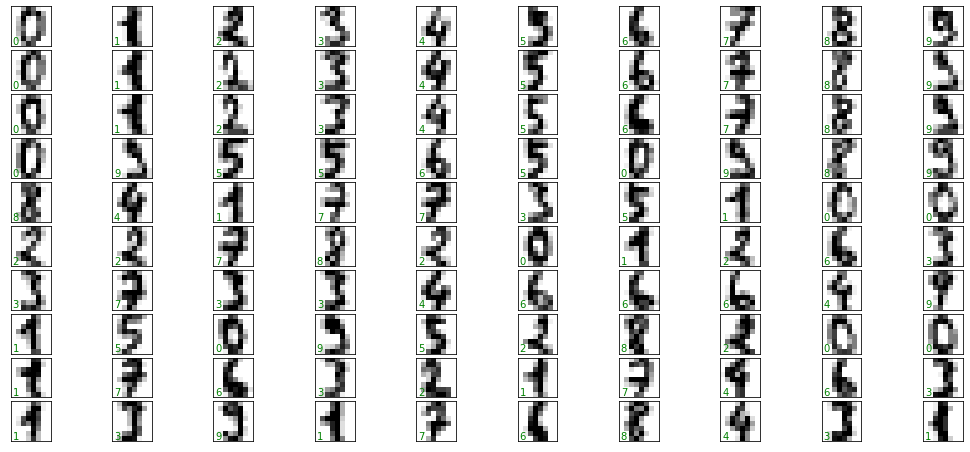

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(18, 8), subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [34]:
# 3차원 데이터를 2차원으로 줄이는 작업을 해야되나 digits에서 해당데이터(8*8 => 64)를 제공
X=digits.data 
y=digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [35]:
# 정규단순베이즈 모형(GaussianNB)

# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 학습모델 적용(정규단순베이즈)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.8333333333333334


In [36]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test, y_test_pred)
print(mat)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]


In [37]:
# 다항단순베이즈모형 MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_mnb_pred = mnb.predict(X_test)
accuracy_score(y_test, y_mnb_pred)

0.9088888888888889